In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
#Checking shape of dataset
df.shape

(614, 13)

There are 614 rows and 13 columns in dataset.

In [4]:
#Checking the data types of all columns
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
#Checking unique values of each columns
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

There are number of unique values in each column.

In [6]:
#Checking the information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#Checking null values in dataset
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We see that Self Employed and Loan amount and credit history has the most number of NaN. Let us fill the categorical variables missing values with the mode and the float one with the mean.

# Filling missing values

In [8]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df.isnull().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
LoanAmount_mean=df['LoanAmount'].mean()
LoanAmount_mean

146.41216216216216

In [10]:
df['LoanAmount'].fillna(value=LoanAmount_mean, inplace=True)
LoanAmount_term_mean=df['Loan_Amount_Term'].mean()
LoanAmount_term_mean

342.0

In [11]:
df['Loan_Amount_Term'].fillna(value=LoanAmount_term_mean, inplace=True)
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [12]:
# After filling the null value checking null values in dataset.
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


Now in dataset there is no null values.

# Checking for the counts of the categorical variables

In [14]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [16]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [18]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [19]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [20]:
#Checking description of dataset
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Data Visualization

# Univariate Analysis

Using Countplot:

<AxesSubplot:title={'center':'Loan Status count'}, xlabel='Loan_Status', ylabel='count'>

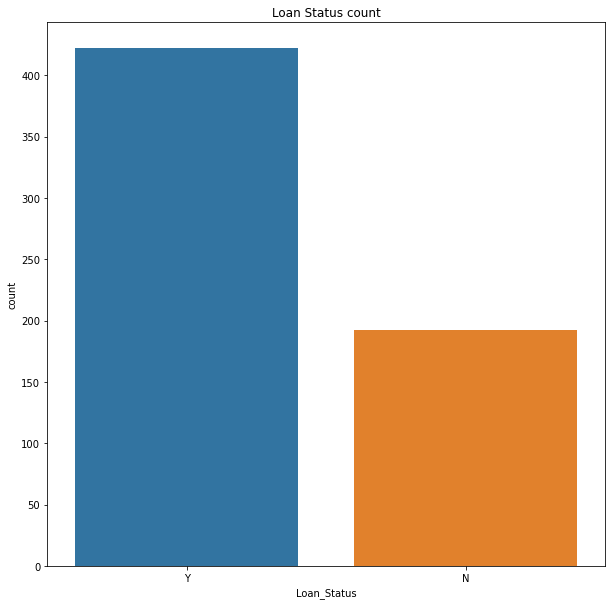

In [22]:
plt.figure(figsize=(10,10))
plt.title('Loan Status count')
sns.countplot(df['Loan_Status'])

As per the above image we conclude that loan status ratio is 68.72%

<AxesSubplot:xlabel='Married', ylabel='count'>

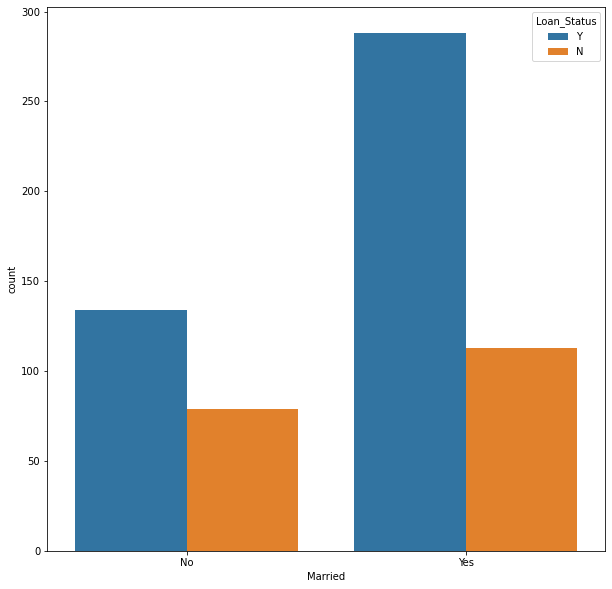

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='Married', hue='Loan_Status')

As per the above image we conclude that more married people are able to get loan as compared to singles.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

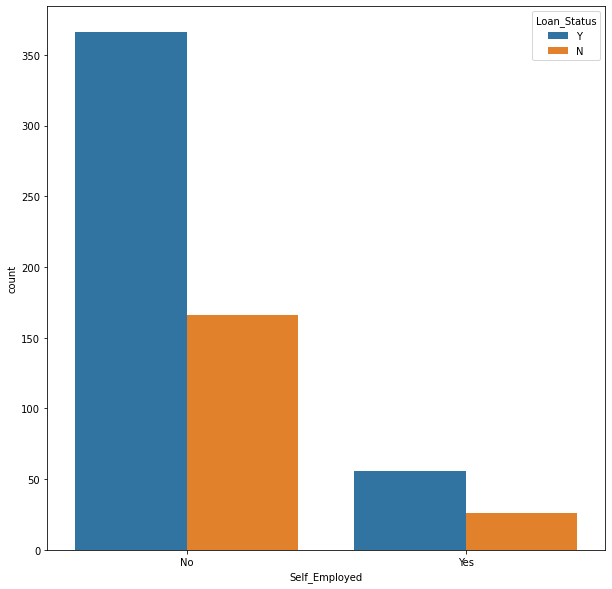

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='Self_Employed', hue='Loan_Status')

As per the above image we conclude that Self_Employed people having more chance to approved loan as compared to non-self employed people.

<AxesSubplot:xlabel='Education', ylabel='count'>

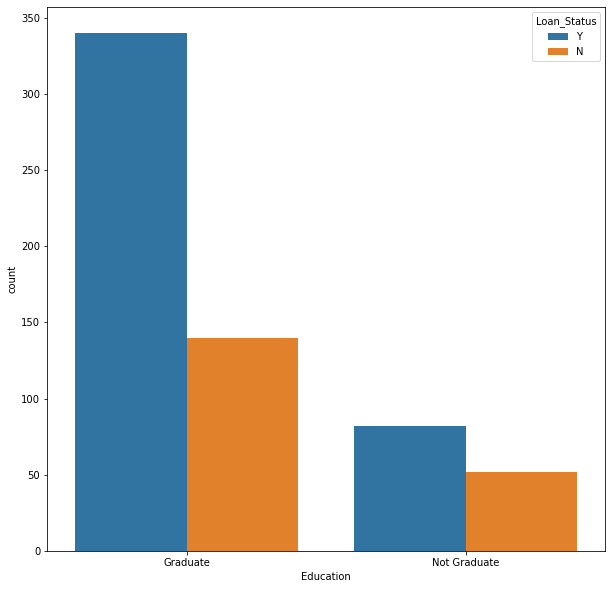

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='Education', hue='Loan_Status')

As per the above image we conclude that Graduate people having more chance to approved loan as compared to Not- Graduate.

<AxesSubplot:xlabel='Gender', ylabel='count'>

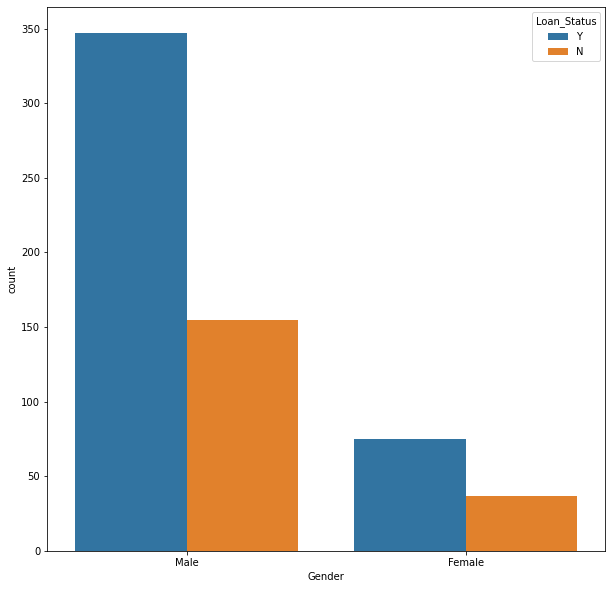

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='Gender', hue='Loan_Status')

As per the above image we conclude that Men are having more chance to get loan as compared to female.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

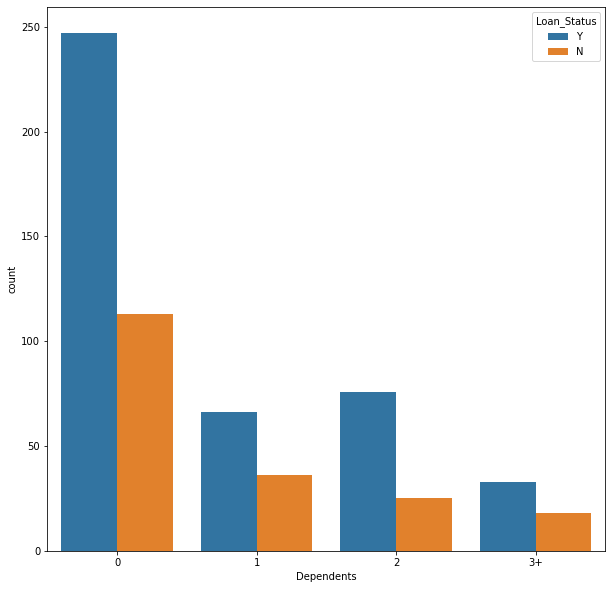

In [27]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='Dependents', hue='Loan_Status')

As per the above image we conclude that person having a 0 dependents having more chance to approved loan as compared to other.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

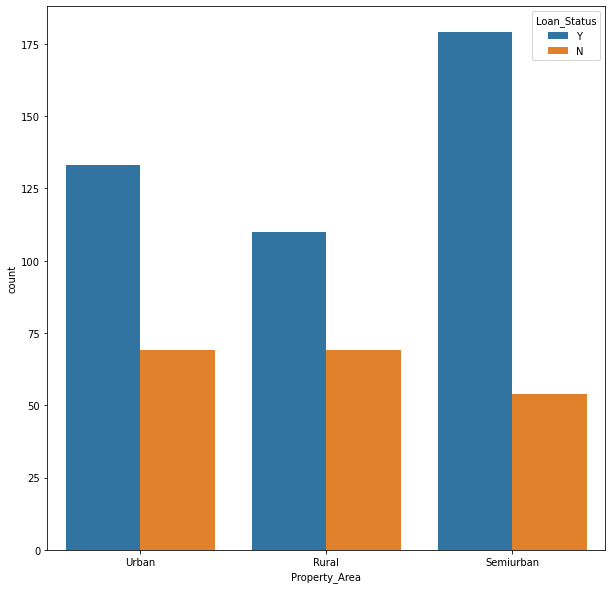

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='Property_Area', hue='Loan_Status')

As per the above image we conclude that people from the semiurban area having more chances to approved loan as compared to others.

# Encode the categorical variables

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Loan_Status'] = labelencoder.fit_transform(df['Loan_Status'])

le=LabelEncoder()
col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
for i in col:
    df[i] = le.fit_transform(df[i])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


As per the above data target variable is imabalanced.

Let us balance the target variable by using upsampling the minority:

In [30]:
no_loan = df[df.Loan_Status==0]
yes_loan = df[df.Loan_Status==1]

In [31]:
from sklearn.utils import resample
loan_upsampled = resample(no_loan,
                         replace = True,
                         n_samples = len(yes_loan),
                         random_state =27)

df_upsampled = pd.concat([yes_loan,loan_upsampled])


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

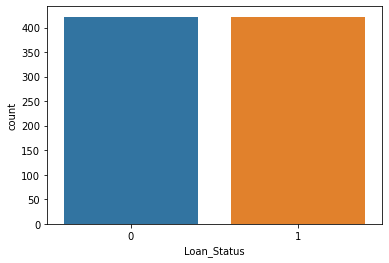

In [32]:
sns.countplot(df_upsampled['Loan_Status'])

<AxesSubplot:xlabel='Married', ylabel='count'>

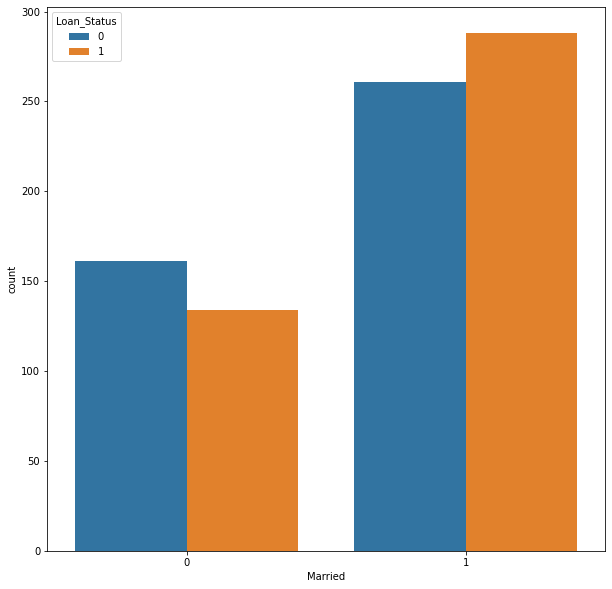

In [34]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_upsampled, x='Married', hue='Loan_Status')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

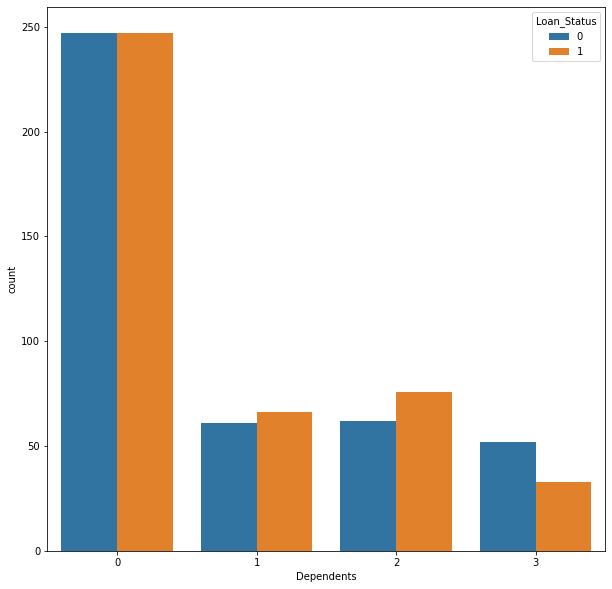

In [35]:
plt.figure(figsize=(10,10))
sns.countplot(data=df_upsampled, x='Dependents', hue='Loan_Status')

<AxesSubplot:xlabel='Gender', ylabel='count'>

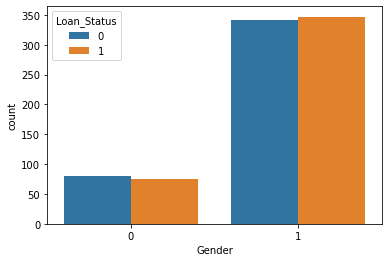

In [36]:
sns.countplot(data=df_upsampled, x='Gender', hue='Loan_Status')

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

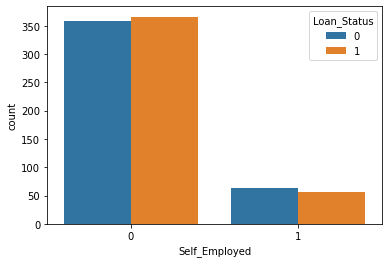

In [37]:
sns.countplot(data=df_upsampled, x='Self_Employed', hue='Loan_Status')

As per the above images we conclude that after using unsampling dataset is balanced now.

In [38]:
# Checking Correlation
cor=df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


# Multivariate Analysis

<AxesSubplot:>

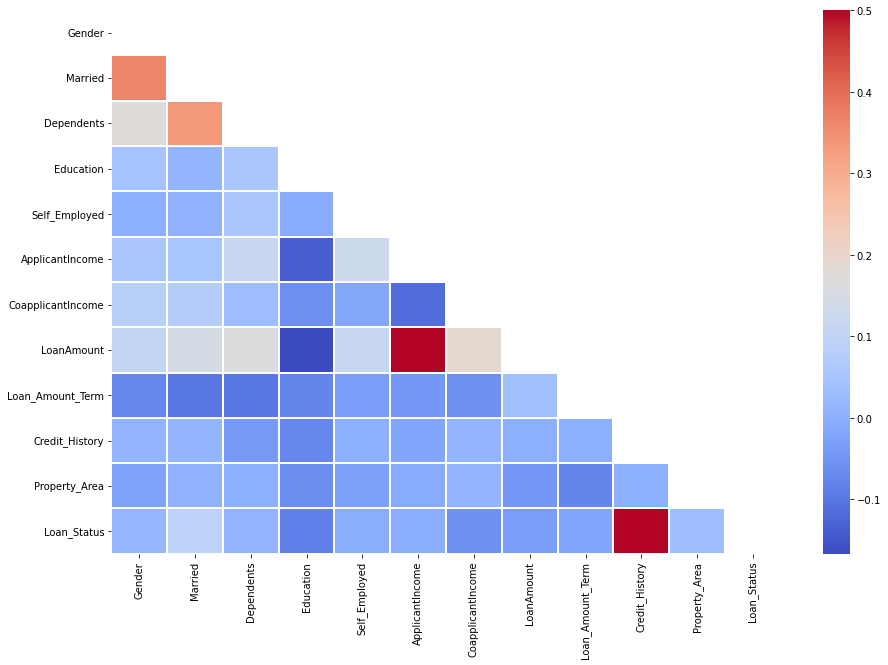

In [40]:
corr = df.corr()
hide = np.zeros_like(corr)
hide[np.triu_indices_from(hide)] = True
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=hide,
            linewidths=.2, cmap="coolwarm")

<AxesSubplot:>

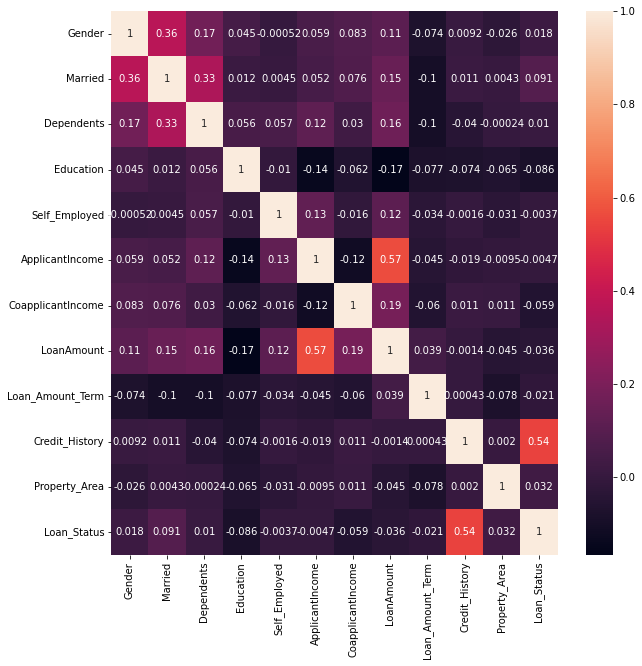

In [42]:
# Using Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

As per the above image we conclued that Loan_Status is highly correlated to Credit History.

# Model Building

In [43]:
# let's drop the unnessarry coloumn
df_upsampled = df_upsampled.drop("Loan_ID",axis =1)

In [44]:
# Splitting the columns
y = df_upsampled['Loan_Status']
x = df_upsampled.drop(['Loan_Status'],axis = 1)

In [45]:
# Scaling Data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 0.4743034 , -1.36419095, -0.74229685, ...,  0.25395253,
         0.53167168,  1.25390754],
       [ 0.4743034 ,  0.73303521, -0.74229685, ...,  0.25395253,
         0.53167168,  1.25390754],
       [ 0.4743034 ,  0.73303521, -0.74229685, ...,  0.25395253,
         0.53167168,  1.25390754],
       ...,
       [-2.10835511, -1.36419095,  0.20982859, ...,  0.25395253,
         0.53167168, -0.00447292],
       [ 0.4743034 ,  0.73303521,  2.11407949, ..., -0.03766099,
        -1.88086002, -0.00447292],
       [ 0.4743034 ,  0.73303521, -0.74229685, ...,  0.25395253,
        -1.88086002, -1.26285337]])

In [47]:
# Splitting the data for training and testing

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

maxaccu =0
maxrs = 0
for i in range(1,200):
    xtrain,xtest,ytrain,ytest=train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(xtrain,ytrain)
    pred = mod.predict(xtest)
    acc = accuracy_score(ytest,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs =i
print("Best accuracy is ",maxaccu,"on random state ",maxrs)

Best accuracy is  0.9052132701421801 on random state  64


After splitting the data best accuracy is 90% on random state is 64.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=.25, random_state=maxrs)

DecisionTreeClassifier:

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       115
           1       0.92      0.83      0.87        96

    accuracy                           0.89       211
   macro avg       0.90      0.89      0.89       211
weighted avg       0.89      0.89      0.89       211



In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[108,   7],
       [ 16,  80]], dtype=int64)

SVC:

In [54]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.94      0.51      0.66       115
           1       0.62      0.96      0.75        96

    accuracy                           0.72       211
   macro avg       0.78      0.74      0.71       211
weighted avg       0.79      0.72      0.70       211



In [55]:
confusion_matrix(y_test,y_pred)

array([[59, 56],
       [ 4, 92]], dtype=int64)

KNeighborsClassifier:

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       115
           1       0.72      0.76      0.74        96

    accuracy                           0.75       211
   macro avg       0.75      0.75      0.75       211
weighted avg       0.76      0.75      0.75       211



In [58]:
confusion_matrix(y_test,y_pred)

array([[86, 29],
       [23, 73]], dtype=int64)

LogisticRegression:

In [59]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(random_state=1)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.93      0.44      0.60       115
           1       0.59      0.96      0.73        96

    accuracy                           0.68       211
   macro avg       0.76      0.70      0.67       211
weighted avg       0.77      0.68      0.66       211



In [60]:
confusion_matrix(y_test,y_pred)

array([[51, 64],
       [ 4, 92]], dtype=int64)

AdaBoostClassifier:

In [61]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.83      0.58      0.68       115
           1       0.63      0.85      0.73        96

    accuracy                           0.71       211
   macro avg       0.73      0.72      0.70       211
weighted avg       0.74      0.71      0.70       211



In [62]:
confusion_matrix(y_test,y_pred)

array([[67, 48],
       [14, 82]], dtype=int64)

RandomForestClassifier:

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
acc = classification_report(y_test,y_pred)
print(acc)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       115
           1       0.90      0.92      0.91        96

    accuracy                           0.91       211
   macro avg       0.91      0.91      0.91       211
weighted avg       0.91      0.91      0.91       211



In [64]:
confusion_matrix(y_test,y_pred)

array([[105,  10],
       [  8,  88]], dtype=int64)

cross_val_score:

In [66]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtc,x_scaled,y,cv=5).mean())
print(cross_val_score(rfc,x_scaled,y,cv=5).mean())
print(cross_val_score(lr,x_scaled,y,cv=5).mean())
print(cross_val_score(abc,x_scaled,y,cv=5).mean())
print(cross_val_score(knc,x_scaled,y,cv=5).mean())
print(cross_val_score(sv,x_scaled,y,cv=5).mean())

0.8589391377852916
0.8933431952662723
0.6919484361792054
0.7286700479008171
0.7701394759087067
0.7203789799943646


As per the above data of model building we conclued that RandomForestClassifier is the best model with the accuracy of 89%.

# Using Metrics:

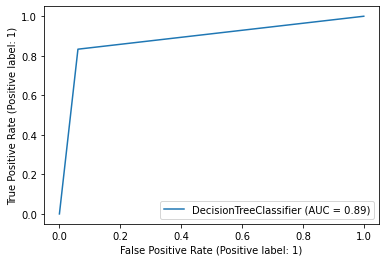

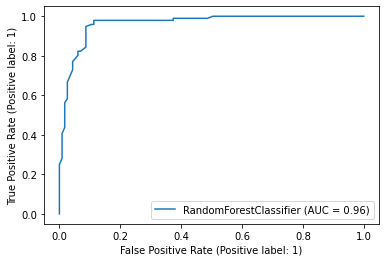

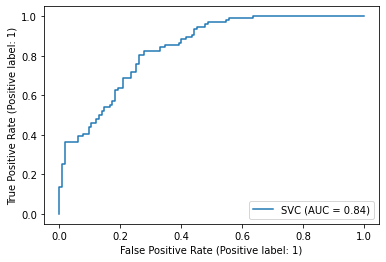

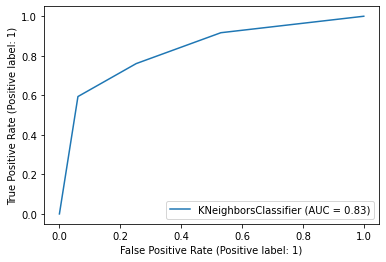

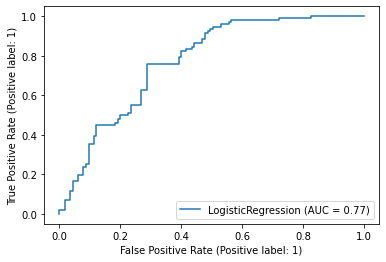

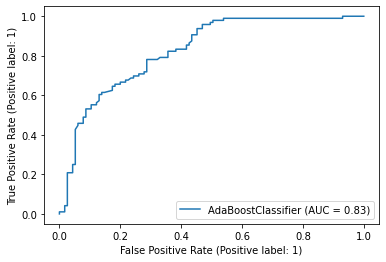

In [67]:
from sklearn import metrics

models =[dtc,rfc,sv,knc,lr,abc]
for i in models:
    metrics.plot_roc_curve(i, X_test, y_test)  
    plt.show()

As we see that Random Forest Classifier is the best model according to the metrics also.

# Hyper parameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV

parameter = { 
            'max_depth' : np.arange(2,40),
              'criterion':['gini', 'entropy'],
             'max_features':['auto', 'sqrt', 'log2'],
             }

GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=3)
GCV.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [69]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 34, 'max_features': 'auto'}

In [70]:
Final_mod = RandomForestClassifier(criterion='gini',max_depth=24,max_features='sqrt')
Final_mod.fit(X_train,y_train)
pred = Final_mod.predict(X_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

90.04739336492891


The result of hyper parameter tuning 90% accurate , its good.

In [71]:
confusion_matrix(y_test,pred)

array([[105,  10],
       [ 11,  85]], dtype=int64)

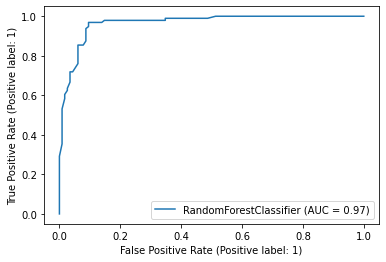

In [72]:
metrics.plot_roc_curve(Final_mod, X_test, y_test)  
plt.show()

Final Model using metrics gives 97% accuracy.

# Saving the model

In [73]:
import joblib
joblib.dump(Final_mod,"LoanStatus.pkl")

['LoanStatus.pkl']